In [3]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
    --------------------------------------- 0.1/5.1 MB 2.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.4/5.1 MB 4.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.8/5.1 MB 5.6 MB/s eta 0:00:01
   -------- ------------------------------- 1.1/5.1 MB 5.9 MB/s eta 0:00:01
   ------------ --------------------------- 1.5/5.1 MB 6.5 MB/s eta 0:00:01
   -------------- ------------------------- 1.9/5.1 MB 6.6 MB/s eta 0:00:01
   ----------------- ---------------------- 2.2/5.1 MB 6.7 MB/s eta 0:00:01
   -------------------- ------------------- 2.6/5.1 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 3.0/5.1 MB 6.9 MB/s eta 0:00:01
   -------------------------- ------------- 3.4/5.1 MB 6.9 MB/s eta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds #for importing pre built datasets

### Read the dataset: imdb reviews

In [5]:
imdb,info=tfds.load("imdb_reviews",with_info=True,as_supervised=True) #load data 

In [9]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [7]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='C:\\Users\\Administrator.DAI-PC2\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_exam

In [10]:
train_data, test_data=imdb['train'],imdb['test']

In [11]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [13]:
training_labels  #0-----> Negative review, 1------->Positive review

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [16]:
training_sentences[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [17]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [18]:
len(training_sentences),len(testing_sentences)

(25000, 25000)

In [19]:
training_labels_final.size,testing_labels_final.size

(25000, 25000)

In [28]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [29]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
word_index;
len(word_index)

86538

In [30]:
word_index


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [31]:
sequences=tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences,maxlen=max_legnth,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length)

In [32]:
len(sequences)

25000

In [33]:
len(sequences[0])

110

In [34]:
len(padded[0])

120

In [35]:
padded

array([[   0,    0,    0, ...,  873,  144,    9],
       [   0,    0,    0, ...,   31,   30,   46],
       [6174,    1, 4915, ...,    8, 6175,   46],
       ...,
       [7628,   36,   10, ...,  167,    5,   28],
       [2676,   10,  215, ...,    1,   88,   10],
       [3874,    4,   30, ...,    5,  994, 5125]])

In [36]:
padded.shape

(25000, 120)

In [37]:
testing_padded.shape

(25000, 120)

In [38]:
padded.dtype

dtype('int32')

### Build the model of Simple RNN

In [40]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding


In [41]:
model_rnn=Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_legnth),
    SimpleRNN(32),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161909 (632.46 KB)
Trainable params: 161909 (632.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compile the RNN model

In [66]:
model_rnn.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [67]:
history_rnn=model_rnn.fit(padded,training_labels_final,epochs=10,
                     validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 30s 36ms/step - loss: 0.0324 - accuracy: 0.9884 - val_loss: 2.3452 - val_accuracy: 0.6146
Epoch 2/10
782/782 [==============================] - 27s 35ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 2.4883 - val_accuracy: 0.6179
Epoch 3/10
782/782 [==============================] - 28s 35ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 2.6483 - val_accuracy: 0.6139
Epoch 4/10
782/782 [==============================] - 27s 34ms/step - loss: 0.0195 - accuracy: 0.9932 - val_loss: 2.8122 - val_accuracy: 0.6180
Epoch 5/10
782/782 [==============================] - 27s 35ms/step - loss: 0.0190 - accuracy: 0.9928 - val_loss: 2.6345 - val_accuracy: 0.6169
Epoch 6/10
782/782 [==============================] - 28s 35ms/step - loss: 0.0166 - accuracy: 0.9940 - val_loss: 2.6568 - val_accuracy: 0.6229
Epoch 7/10
782/782 [==============================] - 28s 35ms/step - loss: 0.0085 - accuracy: 0.9968 - val_loss: 2.8303 - val_accuracy:

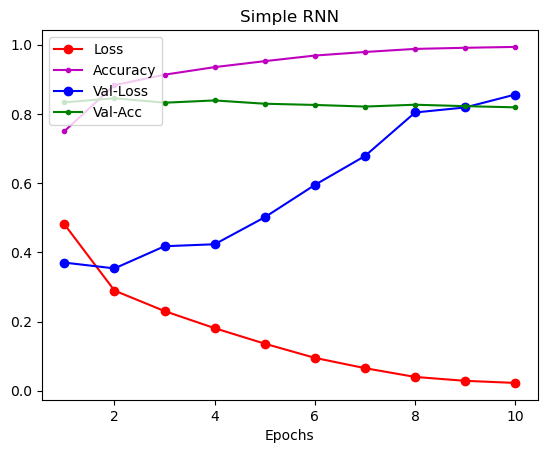

In [68]:
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11),history.history['loss'],color='r',label='Loss',marker='o')
plt.plot(range(1,11), history.history['accuracy'], color='m', label='Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Val-Loss',marker='o')
plt.plot(range(1,11), history.history['val_accuracy'], color='g', label='Val-Acc',marker='.')
plt.legend(loc='upper left')

### building the model for LSTM 

In [49]:
from keras.layers import Bidirectional, GRU, LSTM

In [62]:
model_lstm =Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_legnth),
    Bidirectional(LSTM(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model_lstm.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [64]:
history_lstm=model_lstm.fit(padded,training_labels_final,epochs=10,
                     validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 53s 63ms/step - loss: 0.4592 - accuracy: 0.7743 - val_loss: 0.3409 - val_accuracy: 0.8547
Epoch 2/10
782/782 [==============================] - 48s 62ms/step - loss: 0.2851 - accuracy: 0.8875 - val_loss: 0.3792 - val_accuracy: 0.8436
Epoch 3/10
782/782 [==============================] - 49s 62ms/step - loss: 0.2261 - accuracy: 0.9152 - val_loss: 0.4039 - val_accuracy: 0.8325
Epoch 4/10
782/782 [==============================] - 49s 62ms/step - loss: 0.1778 - accuracy: 0.9352 - val_loss: 0.4401 - val_accuracy: 0.8364
Epoch 5/10
782/782 [==============================] - 48s 62ms/step - loss: 0.1426 - accuracy: 0.9486 - val_loss: 0.5135 - val_accuracy: 0.8302
Epoch 6/10
782/782 [==============================] - 49s 63ms/step - loss: 0.1129 - accuracy: 0.9606 - val_loss: 0.6028 - val_accuracy: 0.8258
Epoch 7/10
782/782 [==============================] - 48s 62ms/step - loss: 0.0842 - accuracy: 0.9712 - val_loss: 0.6300 - val_accuracy:

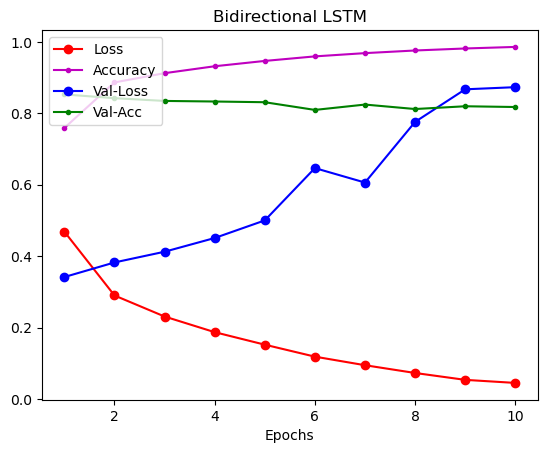

In [53]:
plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.plot(range(1,11),history.history['loss'],color='r',label='Loss',marker='o')
plt.plot(range(1,11), history.history['accuracy'], color='m', label='Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Val-Loss',marker='o')
plt.plot(range(1,11), history.history['val_accuracy'], color='g', label='Val-Acc',marker='.')
plt.legend(loc='upper left')

### building the model for GRU

In [57]:
model_gru =Sequential([
    Embedding(vocab_size,embedding_dim,input_length=max_legnth),
    Bidirectional(GRU(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                12544     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model_gru.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

In [59]:
history=model_gru.fit(padded,training_labels_final,epochs=10,
                     validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 58s 69ms/step - loss: 0.4810 - accuracy: 0.7499 - val_loss: 0.3703 - val_accuracy: 0.8332
Epoch 2/10
782/782 [==============================] - 52s 66ms/step - loss: 0.2894 - accuracy: 0.8828 - val_loss: 0.3535 - val_accuracy: 0.8449
Epoch 3/10
782/782 [==============================] - 52s 67ms/step - loss: 0.2302 - accuracy: 0.9131 - val_loss: 0.4175 - val_accuracy: 0.8321
Epoch 4/10
782/782 [==============================] - 52s 67ms/step - loss: 0.1808 - accuracy: 0.9349 - val_loss: 0.4233 - val_accuracy: 0.8387
Epoch 5/10
782/782 [==============================] - 52s 67ms/step - loss: 0.1360 - accuracy: 0.9522 - val_loss: 0.5013 - val_accuracy: 0.8292
Epoch 6/10
782/782 [==============================] - 52s 67ms/step - loss: 0.0951 - accuracy: 0.9684 - val_loss: 0.5947 - val_accuracy: 0.8257
Epoch 7/10
782/782 [==============================] - 54s 68ms/step - loss: 0.0653 - accuracy: 0.9786 - val_loss: 0.6782 - val_accuracy:

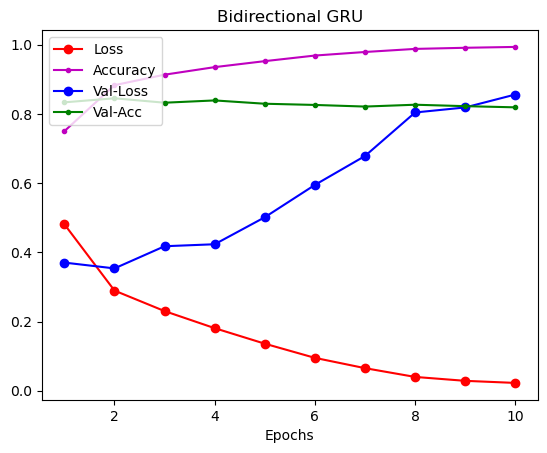

In [65]:
plt.title('Bidirectional GRU')
plt.xlabel('Epochs')
plt.plot(range(1,11),history.history['loss'],color='r',label='Loss',marker='o')
plt.plot(range(1,11), history.history['accuracy'], color='m', label='Accuracy',marker='.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label='Val-Loss',marker='o')
plt.plot(range(1,11), history.history['val_accuracy'], color='g', label='Val-Acc',marker='.')
plt.legend(loc='upper left')

In [ ]:
#compariosn of all 3 model sin one graphs

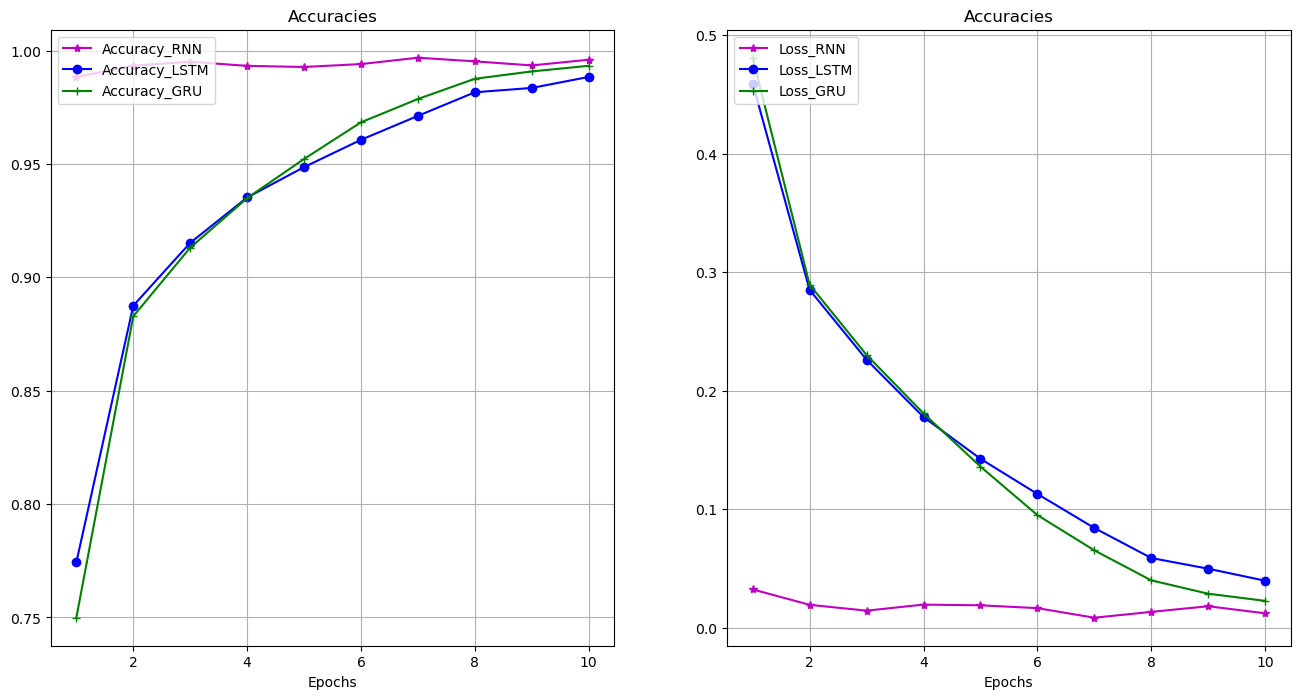

In [70]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()

plt.plot(range(1,11), history_rnn.history['accuracy'], color='m', label='Accuracy_RNN',marker='*')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='b', label='Accuracy_LSTM',marker='o')
plt.plot(range(1,11), history.history['accuracy'], color='g', label='Accuracy_GRU',marker='+')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Accuracies')
plt.xlabel('Epochs')
plt.grid()

plt.plot(range(1,11), history_rnn.history['loss'], color='m', label='Loss_RNN',marker='*')
plt.plot(range(1,11), history_lstm.history['loss'], color='b', label='Loss_LSTM',marker='o')
plt.plot(range(1,11), history.history['loss'], color='g', label='Loss_GRU',marker='+')
plt.legend(loc='upper left')

In [71]:
new1='This was worst movie. Please do not watch it. Waste of money and time'
new2='A must watch movie. I loved to watch it. it was jus amazing'

In [93]:
def predict(model, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_legnth)
    pred = model.predict(padded)
    
    percent_pos=pred[0,0]
    
    if pred[0][0]> 0.5:
        print('Positive', pred[0][0])
    else:
        print('Negative', 1-pred[0][0])
    return pred

In [94]:
predict(model_rnn, new1)
predict(model_rnn, new2)

1/1 [==============================] - 0s 51ms/step
Negative 0.9999984506700912
1/1 [==============================] - 0s 35ms/step
Positive 0.9327762


array([[0.9327762]], dtype=float32)

In [95]:
predict(model_lstm, new1)
predict(model_lstm, new2)

1/1 [==============================] - 0s 44ms/step
Negative 0.9997704144770978
1/1 [==============================] - 0s 30ms/step
Positive 0.9727426


array([[0.9727426]], dtype=float32)

In [96]:
predict(model_gru, new1)
predict(model_gru, new2)

1/1 [==============================] - 0s 42ms/step
Negative 0.9999974733668751
1/1 [==============================] - 0s 40ms/step
Positive 0.9999543


array([[0.9999543]], dtype=float32)